# 1. Business Understanding - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

The data we are using is from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn. 
In our dataset we have 7,043 customers and 21 variables that capture demographics and customer relationship history. Here we are studying customer churn behavior in telecommunication. 
Customer churn has many definitions: customer attrition, customer turnover, or customer defection. The all refer to loss of customers which can be by choice (voluntary) or relocation (involuntary).  Our goal is to predict customers being at risk to churn. This would help the company to design activities to retain the customer to the firm and prevent churn. Our results would help the company in developing strategies to retain their customers, their main asset, which is a key aspect for their success.


In [1]:
# Import basic packages lik numpy, pandas, math plot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pr
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import the data using pd.read_csv() from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn
data = pd.read_csv('C:/Users/sswarupa/OneDrive - GameStop, Inc/Documents/SMU/ML1/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.sample(5).T

,6036,2163,5316,4665,2938
customerID,8008-ESFLK,4021-RQSNY,1470-PSXNM,3884-UEBXB,5294-IMHHT
gender,Female,Male,Male,Female,Male
SeniorCitizen,0,1,0,0,0
Partner,Yes,Yes,Yes,Yes,Yes
Dependents,No,No,Yes,Yes,No
tenure,53,29,49,67,53
PhoneService,Yes,Yes,Yes,No,Yes
MultipleLines,No,Yes,Yes,No phone service,Yes
InternetService,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic
OnlineSecurity,Yes,No,No,Yes,No


# 2. Data Meaning Type - Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
 
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.
 
customerID : Customer ID                           
gender : Whether the customer is a male or a female
SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
Partner : Whether the customer has a partner or not (Yes, No)
Dependents : Whether the customer has dependents or not (Yes, No)
tenure : Number of months the customer has stayed with the company
PhoneService : Whether the customer has a phone service or not (Yes, No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract : The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : The amount charged to the customer monthly
TotalCharges : The total amount charged to the customer
Churn : Whether the customer churned or not (Yes or No) 


In [3]:
pr.ProfileReport(data)

# Data Quality - Verify data quality: Explain any missing values, duplicate data, and outliers.  Are those mistakes? How do you deal with these problems  Be specific.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### data.info() showed that the column “Total Charges” has the type object but should be a number. For that reason, we are changing it into numeric using the pandas function pd.to_numeric()

In [5]:
# converting TotalCharges object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

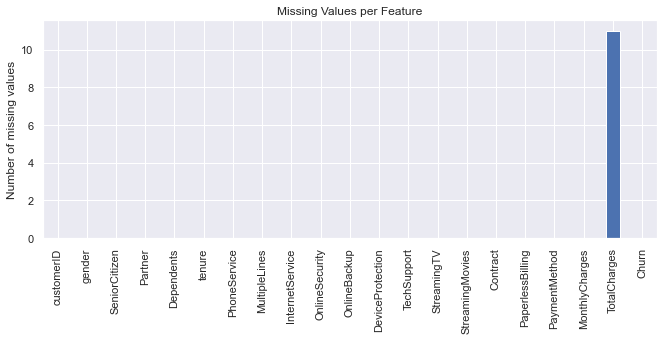

In [6]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');


In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### We have 11 missing values for Total charges. We will fill null values with the mean values of Total charges

In [8]:
data["TotalCharges"].fillna(data["TotalCharges"].mean(), inplace=True)

###### Number of churn

In [9]:
is_churn = data['Churn']=='Yes' #creating a filter where churn ='yes'
y_true = data.Churn[is_churn]

print ("We are interested in the YES class, but has less data = "+str( (y_true.shape[0] / data["Churn"].shape[0]) * 100 ))

We are interested in the YES class, but has less data = 26.536987079369588


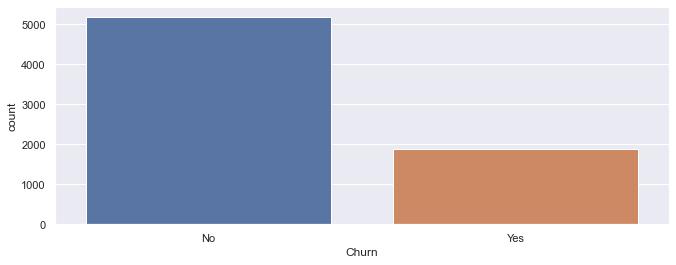

In [10]:
sns.countplot(data["Churn"]);

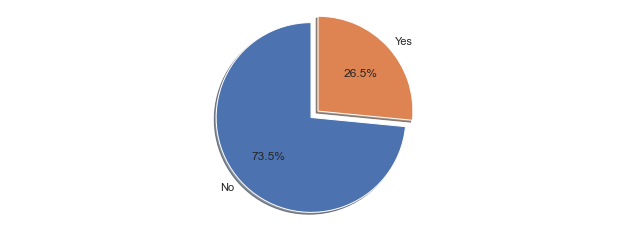

In [11]:
plt.pie(data["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',shadow=True, startangle=90,labels=data["Churn"].unique())
plt.axis('equal') ;

# Simple Statistics - Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Data Transformation

In [13]:
# Getting rid of unwanted columns like Customer Id.
if 'customerID' in data:
    del data['customerID']

In [14]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

data.SeniorCitizen=data.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')

In [15]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No:'})

#gender_map = {"Female" : 0, "Male": 1}
#yes_no_map = {"Yes" : 1, "No" : 0}

#data["gender"] = data["gender"].map(gender_map)

#def binary_encode(features):
#    for feature in features:
#        data[feature] = data[feature].map(yes_no_map)
        
#binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport","StreamingTV", "StreamingMovies"]
#binary_encode(binary_encode_candidate)

# We are covnerting Tenure to categorical column in different bins 
def tenure_group(data) :
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data["tenure"] > 60 :
        return "Tenure_greater_than_60"
data["tenure_bin"] = data.apply(lambda data:tenure_group(data), axis = 1)

# change MonthlyCharges to categorical column
def monthlycharges_split(data) : 
 if data['MonthlyCharges'] <= 30 :
     return '0–30'
 elif (data['MonthlyCharges'] > 30) & (data['MonthlyCharges'] <= 70 ):
     return '30–70'
 elif (data['MonthlyCharges'] > 70) & (data['MonthlyCharges'] <= 99 ):
     return '70–99'
 elif data['MonthlyCharges'] > 99 :
     return '99plus'
data['monthlycharges_bin'] = data.apply(lambda data:monthlycharges_split(data), axis = 1)

# change TotalCharges to categorical column
def totalcharges_split(data) : 
 if data['TotalCharges'] <= 2000 :
     return '0–2k'
 elif (data['TotalCharges'] > 2000) & (data['TotalCharges'] <= 4000 ):
     return '2k-4k'
 elif (data['TotalCharges'] > 4000) & (data['TotalCharges'] <= 6000) :
     return '4k-6k'
 elif data['TotalCharges'] > 6000 :
     return '6kplus'
data['totalcharges_bin'] = data.apply(lambda data:totalcharges_split(data), axis = 1)

data.sample(5).T

,2960,2931,5397,183,374
gender,Male,Female,Male,Male,Male
SeniorCitizen,No,Yes,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,No,Yes,No
tenure,22,33,6,33,37
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,No,No,No
InternetService,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic
OnlineSecurity,Yes,No,No,Yes,No
OnlineBackup,No,Yes,Yes,No,Yes


In [16]:
data_cat = data.select_dtypes(exclude=["number","bool_","float_"])
data_cat.sample(5).T

,5164,1181,1050,2461,6109
gender,Female,Male,Male,Female,Female
SeniorCitizen,No,Yes,Yes,No,No
Partner,No,No,No,No,No
Dependents,No,No,No,No,No
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,No,No phone service,No,Yes
InternetService,DSL,DSL,DSL,No,DSL
OnlineSecurity,Yes,No,No,No:,No
OnlineBackup,No,No,No,No:,Yes
DeviceProtection,No,Yes,Yes,No:,No


In [17]:
data_num = data.select_dtypes(exclude=["bool_", "object_"])
data_num.sample(5).T

,868,2526,6781,1133,5629
tenure,59.00,1.0,3.00,2.00,1.00
MonthlyCharges,85.55,19.4,69.65,19.25,20.05
TotalCharges,5084.65,19.4,220.10,48.35,20.05


In [18]:
#create data audit report for numerical variables
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.var(),x.std(),x.mean(),x.median(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
              x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),
              x.dropna().quantile(0.95),x.dropna().quantile(0.99)],index=['N','NMISS','SUM','VAR','STD','MEAN','MEDIAN','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99'])
num_summary = data_num.apply(lambda x : var_summary(x)).T
num_summary

,N,NMISS,SUM,VAR,STD,MEAN,MEDIAN,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99
tenure,7043.0,0.0,2.279900e+05,6.031681e+02,24.559481,32.371149,29.00,0.00,1.0,1.00,2.00,9.000,29.00,55.00,69.00,72.000,72.000
MonthlyCharges,7043.0,0.0,4.561166e+05,9.054109e+02,30.090047,64.761692,70.35,18.25,19.2,19.65,20.05,35.500,70.35,89.85,102.60,107.400,114.729
TotalCharges,7043.0,0.0,1.608129e+07,5.130226e+06,2265.000258,2283.300441,1400.55,18.80,19.9,49.65,84.61,402.225,1400.55,3786.60,5973.69,6921.025,8039.256


# Visualize Attributes - Visualize the most important attributes appropriately (at least 5 attributes).  Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

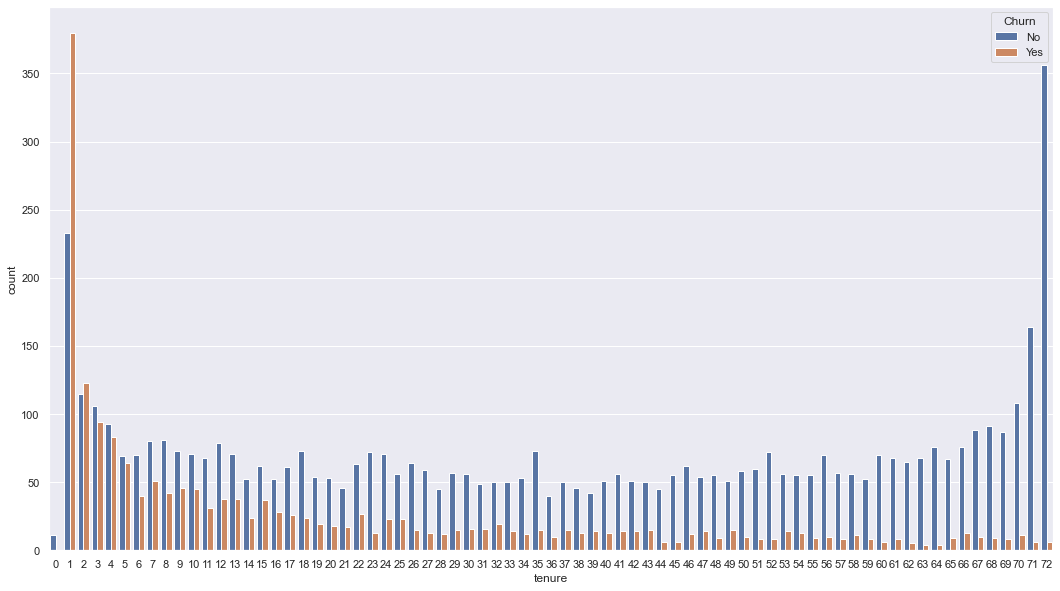

In [19]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(data["tenure"],hue = data["Churn"]);

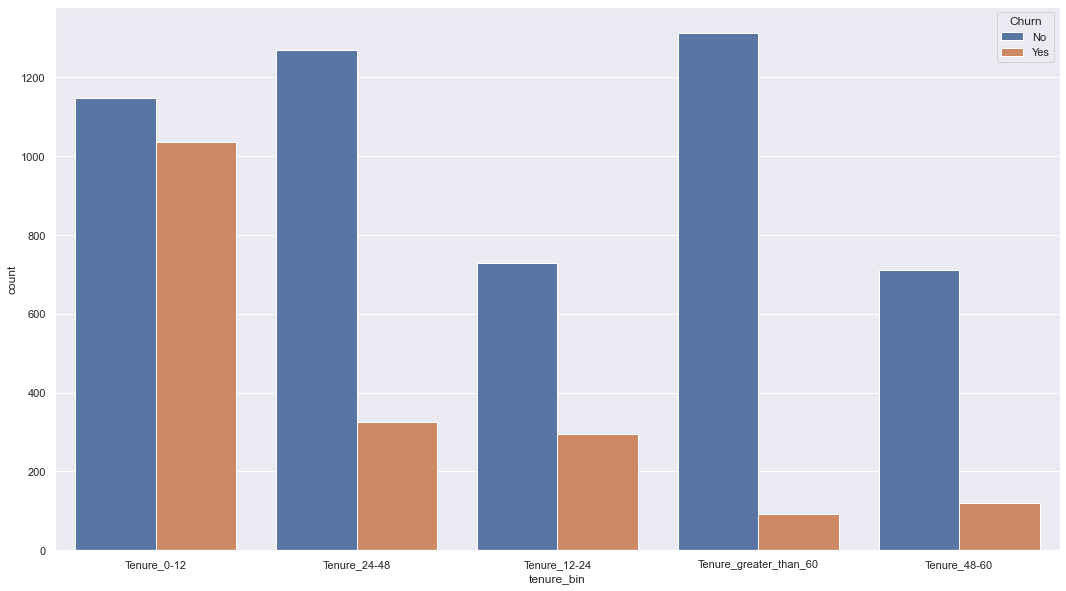

In [20]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(data["tenure_bin"],hue = data["Churn"]);

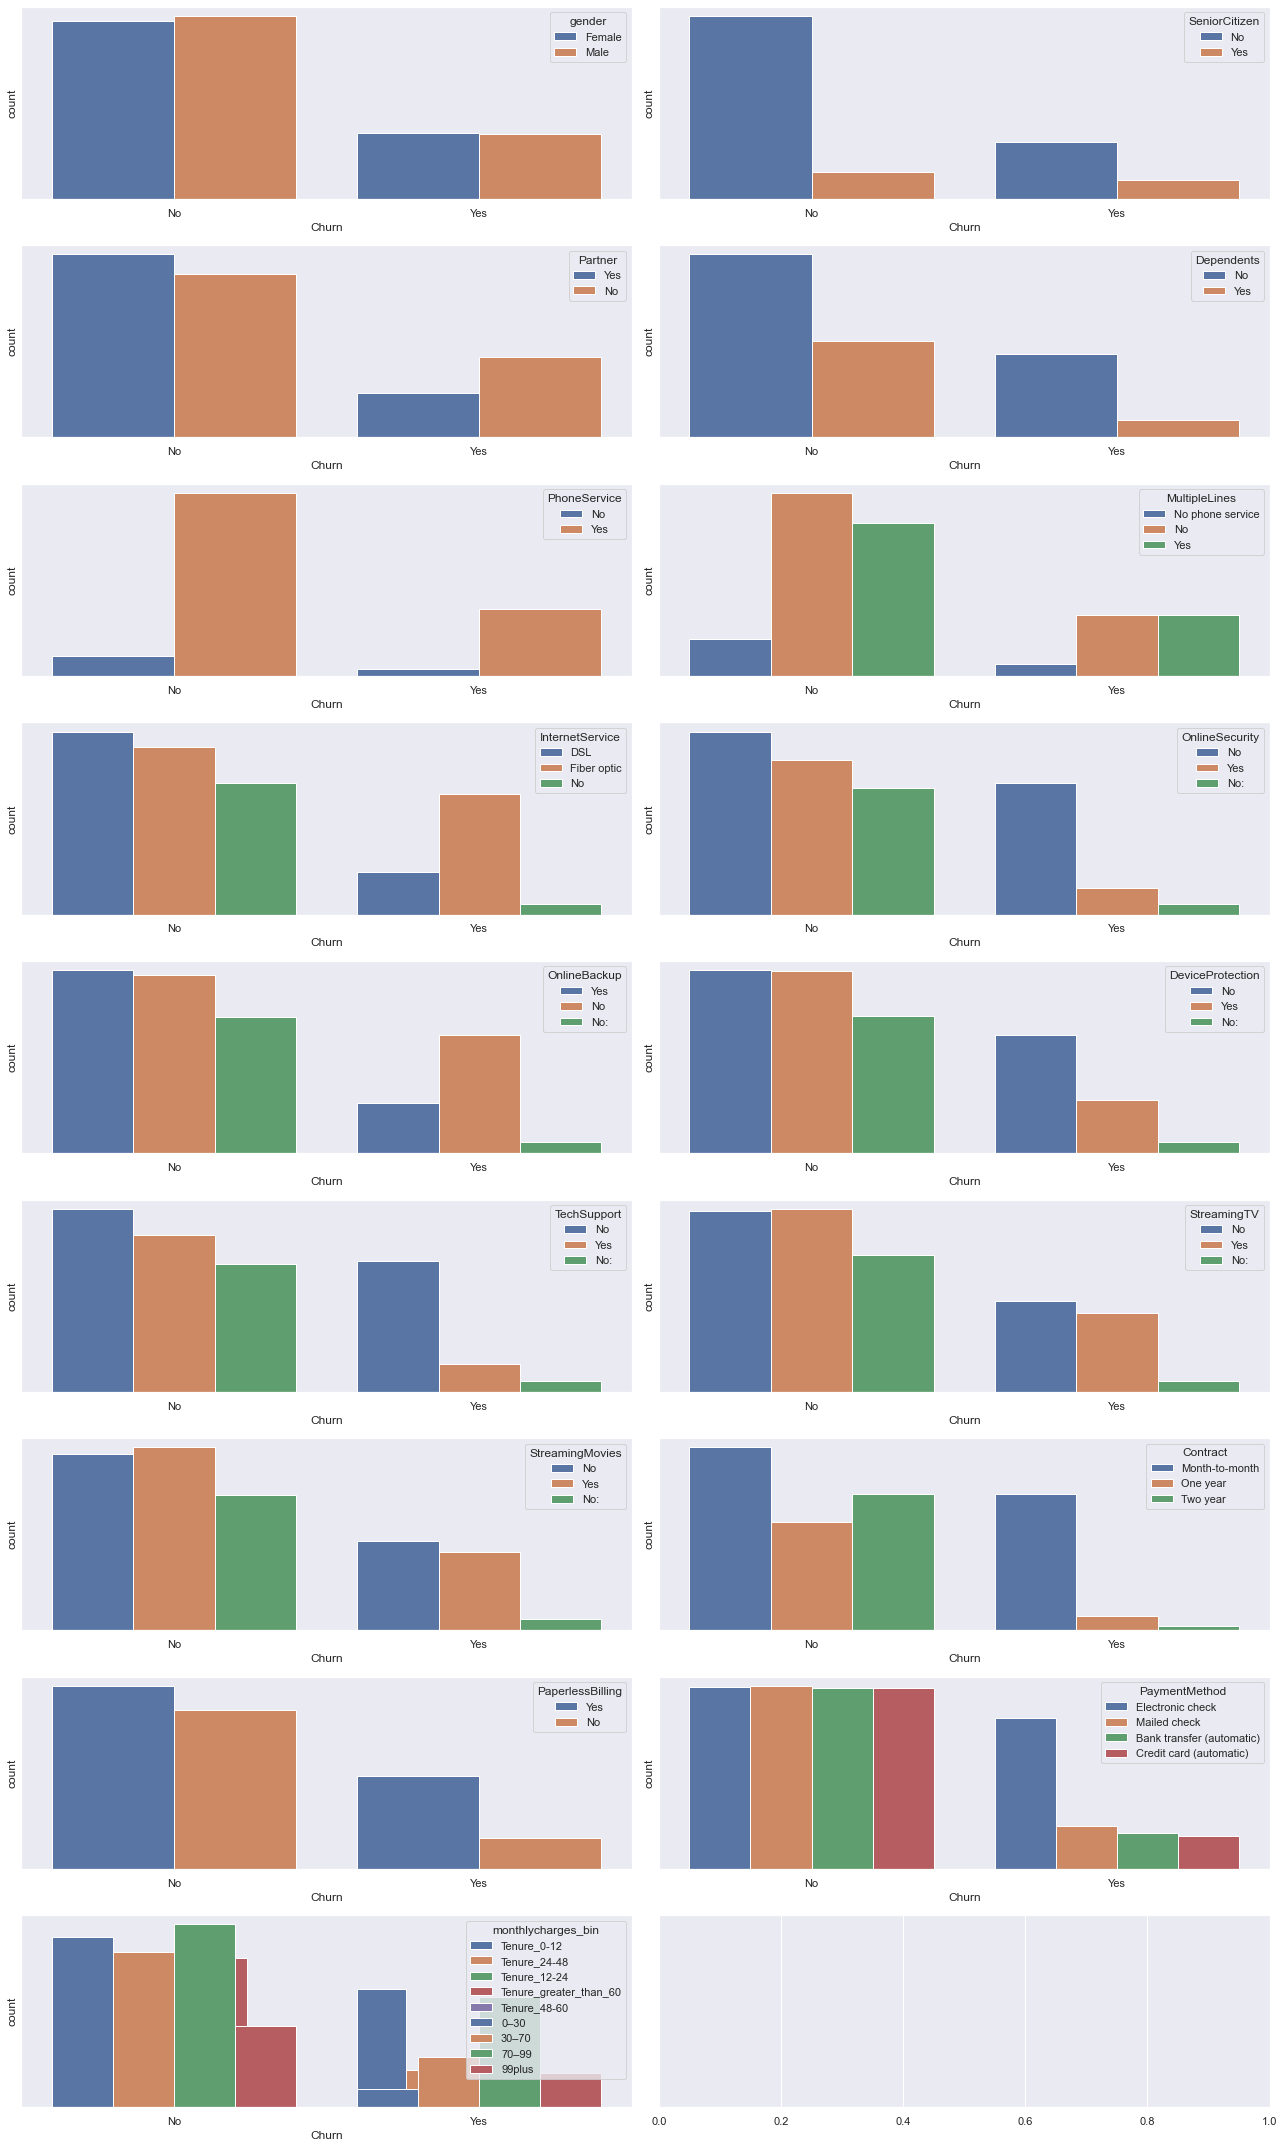

In [21]:
f, axes = plt.subplots(nrows=9, ncols=2, figsize=(18,30))

sns.countplot(data["Churn"],hue = data["gender"],ax = axes[0,0])
sns.countplot(data["Churn"],hue = data["SeniorCitizen"],ax = axes[0,1])
sns.countplot(data["Churn"],hue = data["Partner"],ax = axes[1,0])
sns.countplot(data["Churn"],hue = data["Dependents"],ax = axes[1,1])
sns.countplot(data["Churn"],hue = data["PhoneService"],ax = axes[2,0])
sns.countplot(data["Churn"],hue = data["MultipleLines"],ax = axes[2,1])
sns.countplot(data["Churn"],hue = data["InternetService"],ax = axes[3,0])
sns.countplot(data["Churn"],hue = data["OnlineSecurity"],ax = axes[3,1])
sns.countplot(data["Churn"],hue = data["OnlineBackup"],ax = axes[4,0])
sns.countplot(data["Churn"],hue = data["DeviceProtection"],ax = axes[4,1])
sns.countplot(data["Churn"],hue = data["TechSupport"],ax = axes[5,0])
sns.countplot(data["Churn"],hue = data["StreamingTV"],ax = axes[5,1])
sns.countplot(data["Churn"],hue = data["StreamingMovies"],ax = axes[6,0])
sns.countplot(data["Churn"],hue = data["Contract"],ax = axes[6,1])
sns.countplot(data["Churn"],hue = data["PaperlessBilling"],ax = axes[7,0])
sns.countplot(data["Churn"],hue = data["PaymentMethod"],ax = axes[7,1])
sns.countplot(data["Churn"],hue = data["tenure_bin"],ax = axes[8,0])
sns.countplot(data["Churn"],hue = data["monthlycharges_bin"],ax = axes[8,0])

plt.setp(axes, yticks=[])
plt.tight_layout()

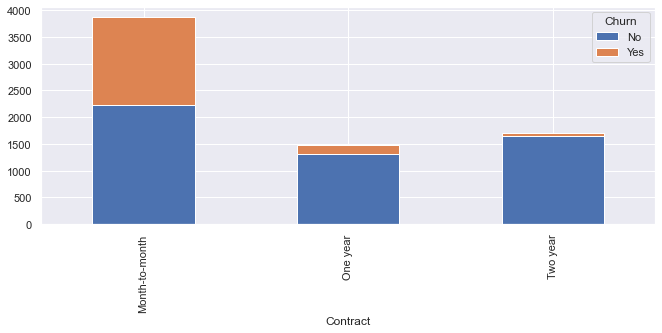

In [22]:
data.groupby(['Contract','Churn']).size().unstack().plot(kind='bar',stacked=True); 
#Clearly, users with Month-to-Month contract are more likely to churn 

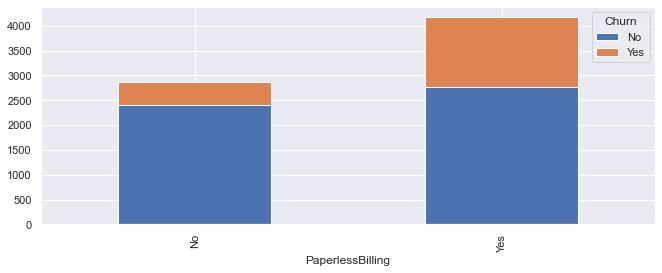

In [23]:
data.groupby(['PaperlessBilling','Churn']).size().unstack().plot(kind='bar',stacked=True);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

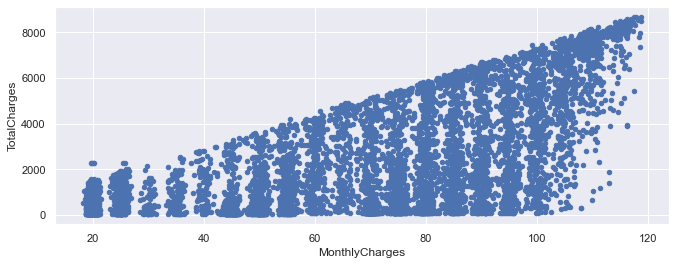

In [24]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

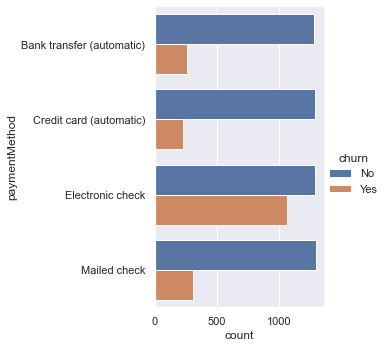

In [25]:
#payment method and churn
payment_method_count  = data[['PaymentMethod','Churn']].groupby(['PaymentMethod','Churn']).size().reset_index()
payment_method_count.columns = ['paymentMethod','churn','count']
sns.catplot(x = 'count',y='paymentMethod',hue='churn',data = payment_method_count,kind='bar')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

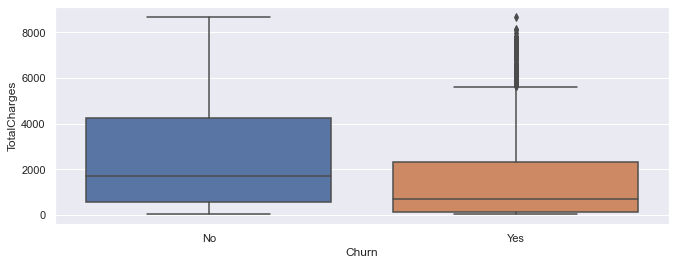

In [26]:
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = data)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

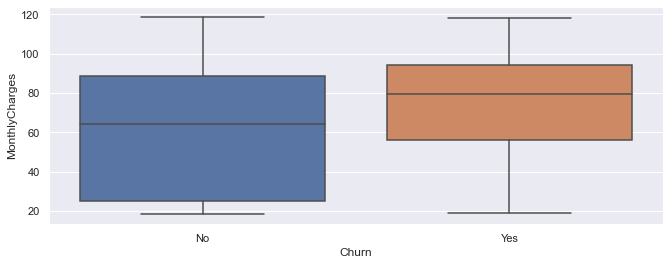

In [27]:
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = data)

# Explore Joint Attributes - Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


In [ ]:
sns.swarmplot(x = 'SeniorCitizen', y = 'MonthlyCharges', hue="Churn", data = data)

In [ ]:
import numpy as np
corr_abs = data.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

In [ ]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(data.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

In [ ]:
sns.heatmap(data[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them, let's remove TotalCharges

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

 # Question 1: Which customer has highest probability to switch to another telecom (known as Churn)
# Question 2: What could be the plausible reasons why churn is happening.
# Question 3: How good the prediction is? Can we rely on this predictive analytics.